# Policy churn prediction

This notebook contains exploratory data analysis for the sample data used for Policy churn prediction

In [ ]:
#importing & Suppressing warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns

In [3]:
df=pd.read_excel('sample_churn_data.xls')

# EDA - Exploratory Data Analysis

In [4]:
df.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 13 columns):
id                                  16383 non-null int64
perc_premium_paid_by_cash_credit    16383 non-null float64
age_in_days                         16383 non-null int64
Income                              16383 non-null int64
Count_3-6_months_late               16361 non-null float64
Count_6-12_months_late              16361 non-null float64
Count_more_than_12_months_late      16361 non-null float64
application_underwriting_score      15740 non-null float64
no_of_premiums_paid                 16383 non-null int64
sourcing_channel                    16383 non-null object
residence_area_type                 16383 non-null object
premium                             16383 non-null int64
renewal                             16383 non-null int64
dtypes: float64(5), int64(6), object(2)
memory usage: 1.6+ MB


In [33]:
df.isnull().sum()

id                                    0
perc_premium_paid_by_cash_credit      0
age_in_days                           0
Income                                0
Count_3-6_months_late                22
Count_6-12_months_late               22
Count_more_than_12_months_late       22
application_underwriting_score      643
no_of_premiums_paid                   0
sourcing_channel                      0
residence_area_type                   0
premium                               0
renewal                               0
dtype: int64

In [6]:
df.isnull().sum()

id                                    0
perc_premium_paid_by_cash_credit      0
age_in_days                           0
Income                                0
Count_3-6_months_late                22
Count_6-12_months_late               22
Count_more_than_12_months_late       22
application_underwriting_score      643
no_of_premiums_paid                   0
sourcing_channel                      0
residence_area_type                   0
premium                               0
renewal                               0
dtype: int64

### EDA - Very few nulls, anyway we will be using Random Forest model for prediction and we won't remove these records

### EDA - Correlation

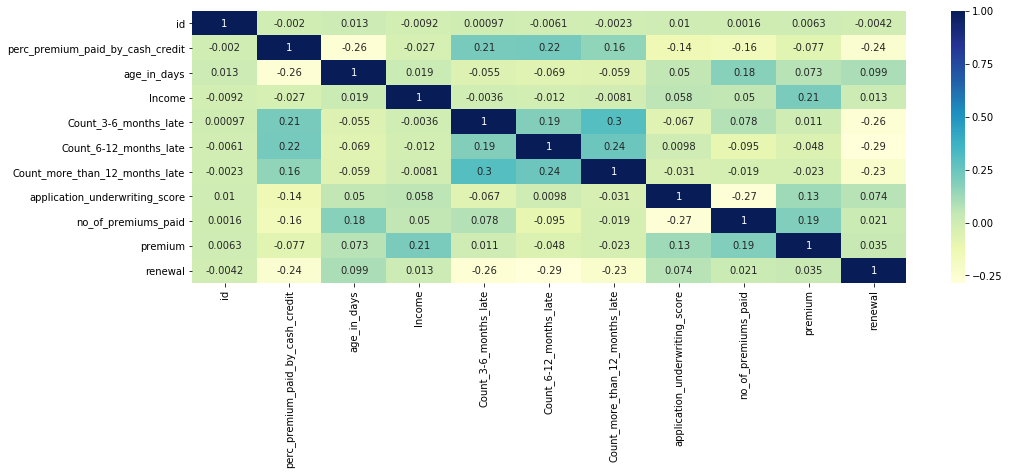

In [38]:
plt.figure(figsize = (16,5))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

### EDA : All correlation is under 0.2, so no fields need to be eliminated due to inter dependency

### EDA: Effect of underwriting score

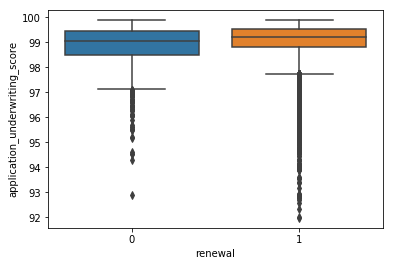

In [7]:
sns.boxplot(y='application_underwriting_score', x='renewal', data=df)

Let is narrow the range by removing 

### Not muchcorrelation on application_underwriting_score, 
Let us focus the range by removing outliers

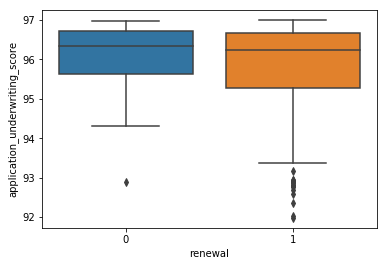

In [40]:
df1 = df[df.application_underwriting_score < 97]
sns.boxplot(y='application_underwriting_score', x='renewal', data=df1)

### Still not muchcorrelation on application_underwriting_score, but more outliers are under renewal than non-renewal.
It appears low underwriting score necessarily does not mean churn, understandable.
We can keep this variable

### EDA - effect of Income of the customer

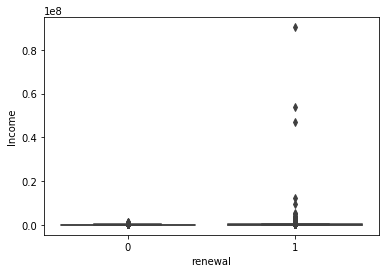

In [8]:
sns.boxplot(y='Income', x='renewal', data=df)

###  Remove outliers and check for deeper understanding

In [28]:
df2 = df[df.Income < 300000]

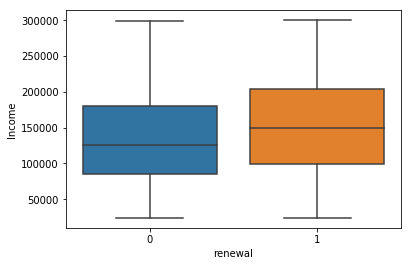

In [29]:
sns.boxplot(y='Income', x='renewal', data=df2)

### Those who renewed have slightly higher income renew more

### EDA - Effect of how the customer paid premium - cash?

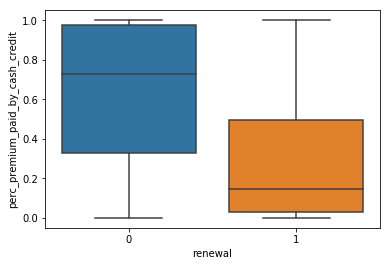

In [31]:
sns.boxplot(y='perc_premium_paid_by_cash_credit', x='renewal', data=df)

### Those who paid premium as cash as higher percentage seem to be less inclined to renew

### EDA - Effect of age of policy

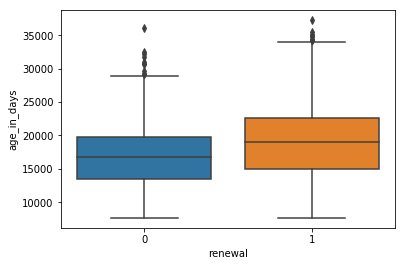

In [10]:
sns.boxplot(y='age_in_days', x='renewal', data=df)

### Customers who have been around longer tend to remain and renew their policies

### EDA - Effect of sourcing channel

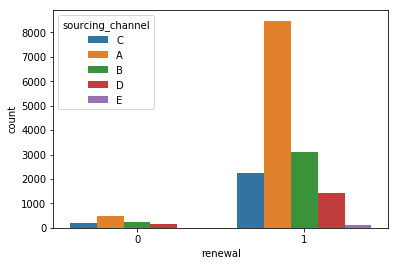

In [45]:
sns.countplot(data=df, hue="sourcing_channel",x="renewal")

### Channel A seems to have a slightly higher proportion of renewals than B 94% vs 92% 

### EDA - Effect of urban/rural

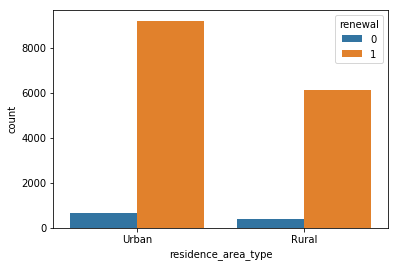

In [48]:
sns.countplot(data=df, hue="renewal",x="residence_area_type")

### Rural and Urban do not seems to have impact on its own

### EDA  - premium

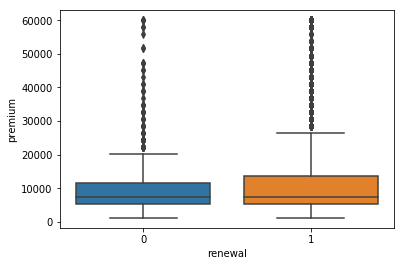

In [49]:
sns.boxplot(y='premium', x='renewal', data=df)

### Premium alone does not have much impact on churn

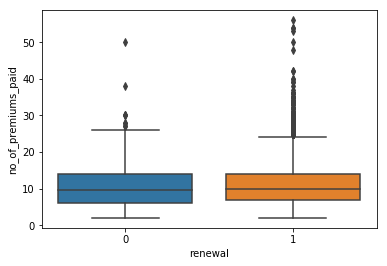

In [50]:
sns.boxplot(y='no_of_premiums_paid', x='renewal', data=df)

### Those who paid more premiums, especially outliers tend to renew policy
This could be similar to age of policy but we did not see correlation as the data may have issues

### EDA - Effect of Late payments

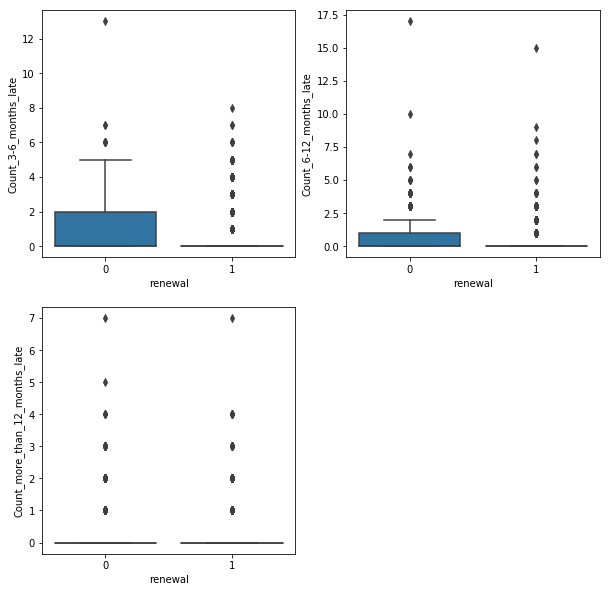

In [51]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(y='Count_3-6_months_late', x='renewal', data=df)
plt.subplot(2,2,2)
sns.boxplot(y='Count_6-12_months_late', x='renewal', data=df)
plt.subplot(2,2,3)
sns.boxplot(y='Count_more_than_12_months_late', x='renewal', data=df)


### There seems to be effect of paying premium upto 12 months late has effect on churn
Those who paid late frequently less inclined to renew

# Summary of EDA 

- No variables have interdependent correlation that justifies their removal
- Underwriting score seems to have slight effect, better score seems more churn
- Higher income leads to slightly better renewals
- Those who paid premiums in cash disposed towards churn
- Those who had policy longer more loyal
- Very slight impact of channels on renewals 
- Whether the policy is Urban or Rural does not have a direct impact on churn
- Amount of premium does not have a direct impact on churn
- Those who frequently delay payments likely to churn out
